In [2]:
import pandas as pd

df = pd.read_csv(r"C:\Users\Aagaaz Kapoor\Desktop\CT\titanic data\Titanic-Dataset.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()
df.describe()
df.isnull().sum()  # Check missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

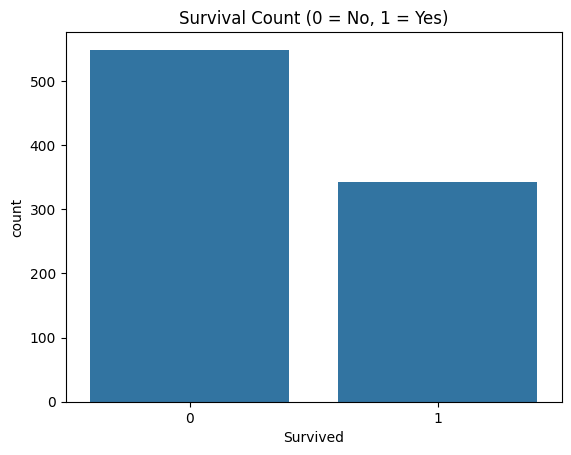

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Survived', data=df)
plt.title('Survival Count (0 = No, 1 = Yes)')
plt.show()


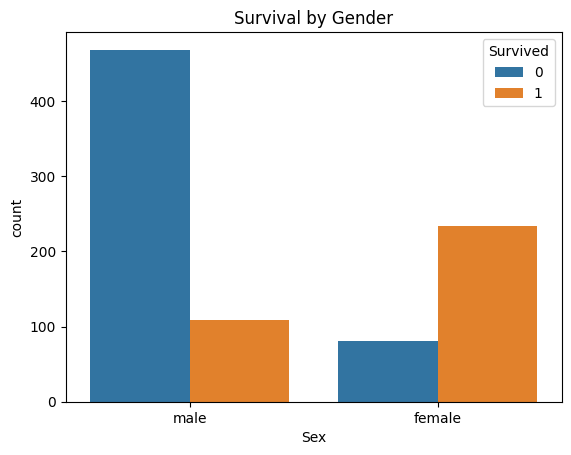

In [5]:
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival by Gender')
plt.show()


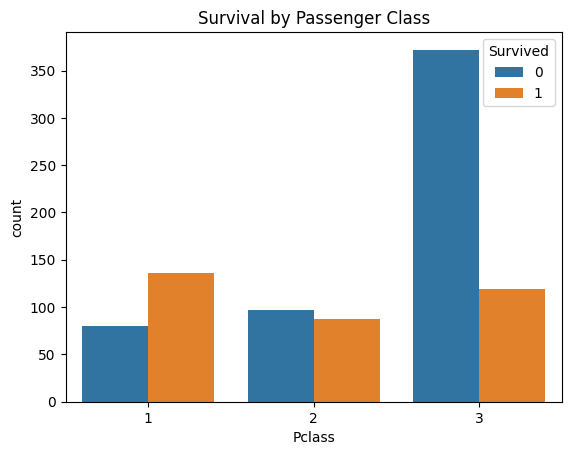

In [6]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival by Passenger Class')
plt.show()


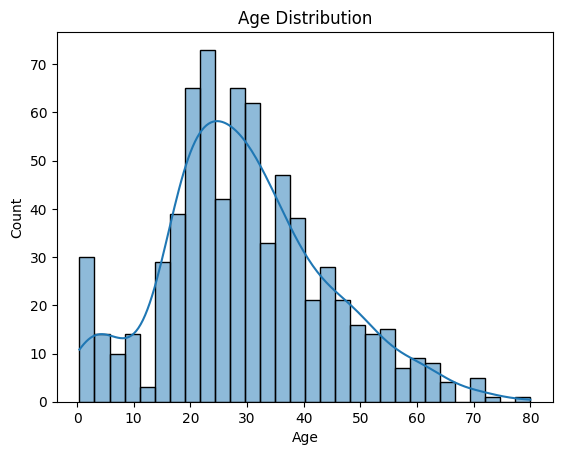

In [7]:
sns.histplot(data=df, x='Age', kde=True, bins=30)
plt.title('Age Distribution')
plt.show()


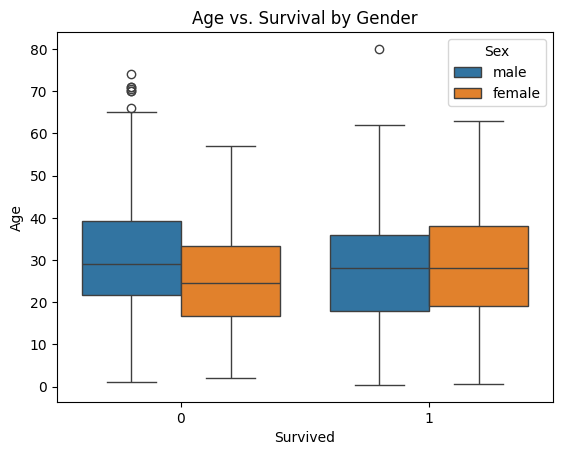

In [8]:
sns.boxplot(x='Survived', y='Age', hue='Sex', data=df)
plt.title('Age vs. Survival by Gender')
plt.show()


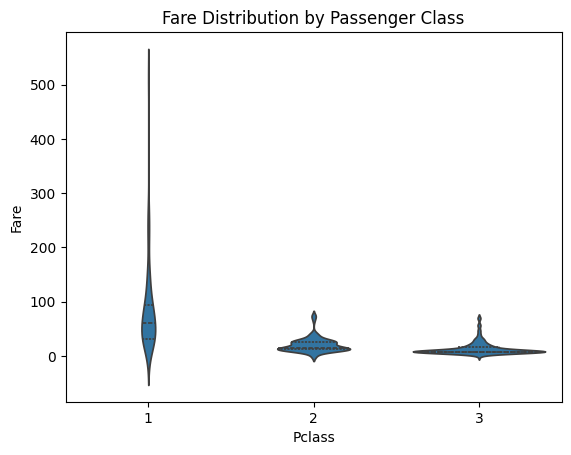

In [9]:
sns.violinplot(x='Pclass', y='Fare', data=df, inner='quartile')
plt.title('Fare Distribution by Passenger Class')
plt.show()


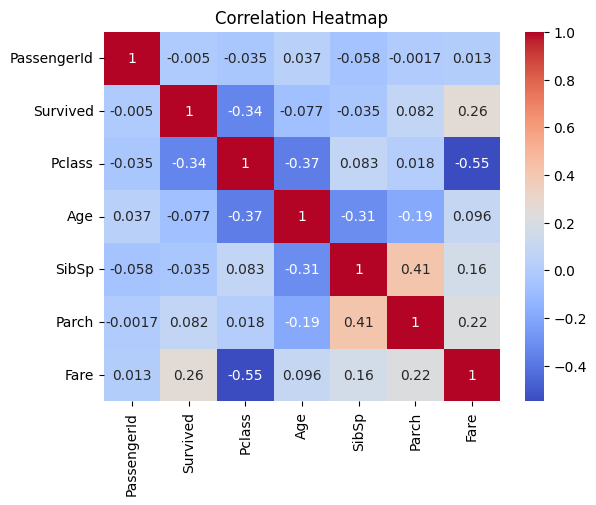

In [10]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


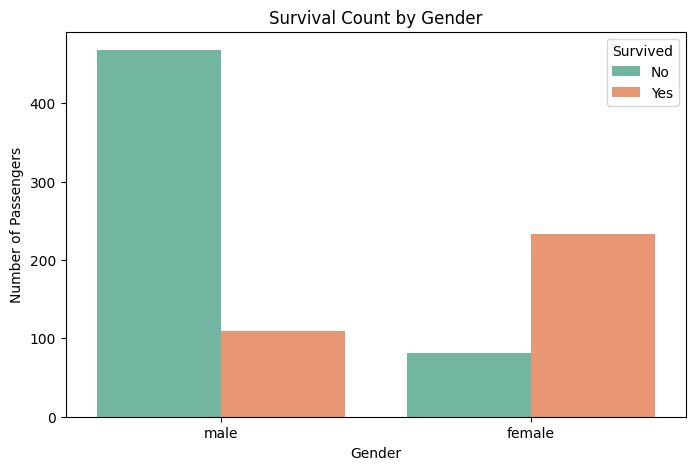

In [11]:

plt.figure(figsize=(8, 5))
sns.countplot(x='Sex', hue='Survived', data=df, palette='Set2')

plt.title('Survival Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()

In [13]:
# prompt: fill missing value with machine learning algo

# Import necessary libraries
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Load the dataset (change path if needed)
titanic_data = pd.read_csv('Titanic-Dataset.csv')  # <- make sure the file exists in your working directory

# Create a copy to avoid modifying the original DataFrame
titanic_data_filled = titanic_data.copy()

# Separate numerical and categorical columns
numerical_cols = titanic_data_filled.select_dtypes(include=['number']).columns
categorical_cols = titanic_data_filled.select_dtypes(exclude=['number']).columns

# Use IterativeImputer for numerical features
imputer_num = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)
titanic_data_filled[numerical_cols] = imputer_num.fit_transform(titanic_data_filled[numerical_cols])

# Fill categorical features with the mode (most frequent value)
for col in categorical_cols:
    titanic_data_filled[col] = titanic_data_filled[col].fillna(titanic_data_filled[col].mode()[0])

# Verify if there are any missing values left
print("\nMissing values after imputation:\n", titanic_data_filled.isnull().sum())



Missing values after imputation:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


c:\Users\Aagaaz Kapoor\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_iterative.py:895: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(



Survival Count:
 Survived
0.0    549
1.0    342
Name: count, dtype: int64


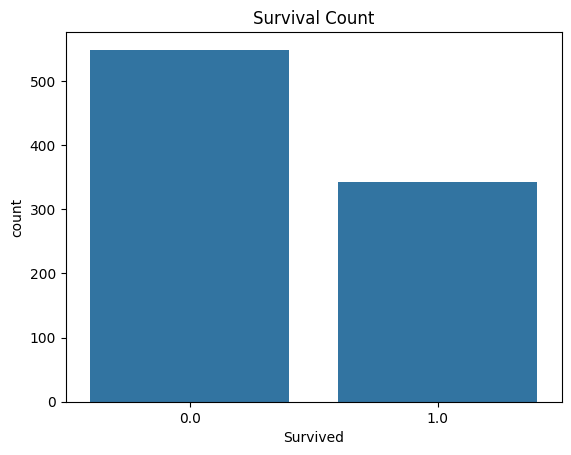

In [19]:
# Analyze 'survived'

print("\nSurvival Count:\n", titanic_data_filled['Survived'].value_counts())

sns.countplot(x='Survived', data=titanic_data_filled)

plt.title('Survival Count')

plt.show()



Pclass Distribution:
 Pclass
3.0    491
1.0    216
2.0    184
Name: count, dtype: int64


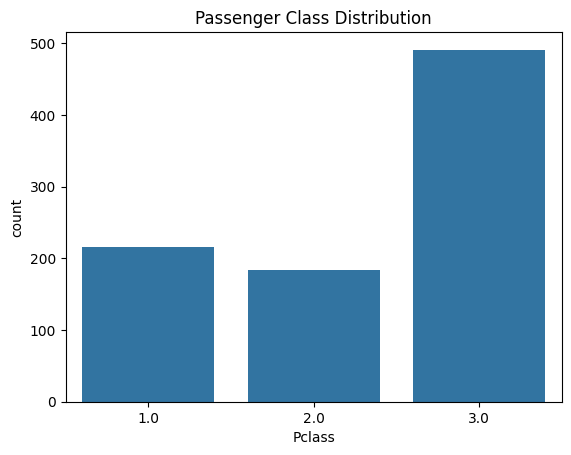

In [21]:
# Analyze 'pclass'

print("\nPclass Distribution:\n", titanic_data_filled['Pclass'].value_counts())

sns.countplot(x='Pclass', data=titanic_data_filled)

plt.title('Passenger Class Distribution')

plt.show()


Age Statistics:
 count    891.000000
mean      29.633520
std       13.712369
min        0.420000
25%       21.180000
50%       28.000000
75%       37.000000
max       80.000000
Name: Age, dtype: float64


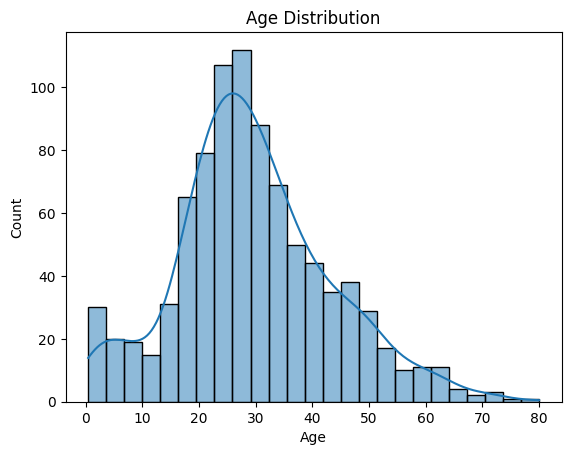

In [22]:
# Analyze 'age'

print("\nAge Statistics:\n", titanic_data_filled['Age'].describe())

sns.histplot(x='Age', data=titanic_data_filled, kde=True)

plt.title('Age Distribution')

plt.show()


Sex Distribution:
 Sex
male      577
female    314
Name: count, dtype: int64


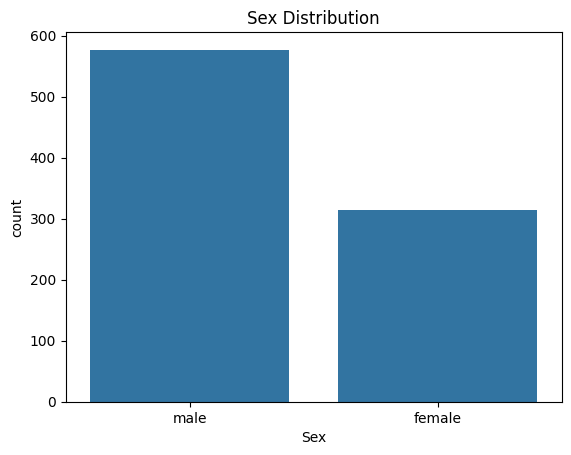

In [23]:
# Analyze 'sex'

print("\nSex Distribution:\n", titanic_data_filled['Sex'].value_counts())

sns.countplot(x='Sex', data=titanic_data_filled)

plt.title('Sex Distribution')

plt.show()


Survival by Gender:
 Sex     Survived
female  1.0         233
        0.0          81
male    0.0         468
        1.0         109
Name: count, dtype: int64


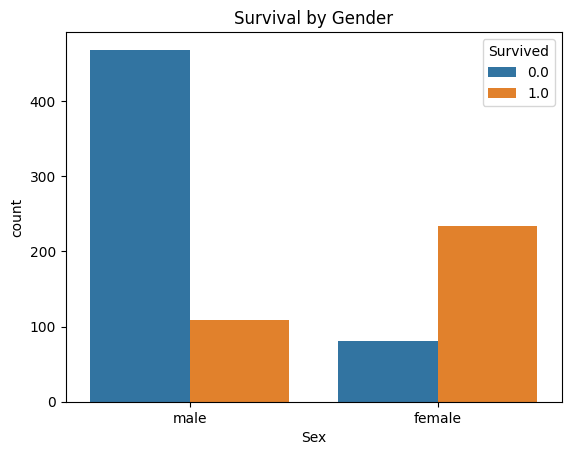

In [24]:
# Analyze survival based on gender

print("\nSurvival by Gender:\n", titanic_data_filled.groupby('Sex')['Survived'].value_counts())

sns.countplot(x='Sex', hue='Survived', data=titanic_data_filled)

plt.title('Survival by Gender')

plt.show()


Survival by Passenger Class:
 Pclass  Survived
1.0     1.0         136
        0.0          80
2.0     0.0          97
        1.0          87
3.0     0.0         372
        1.0         119
Name: count, dtype: int64


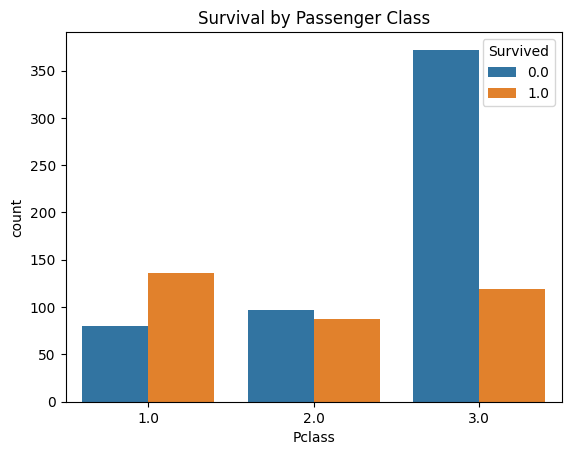

In [25]:
# Analyze survival based on passenger class

print("\nSurvival by Passenger Class:\n", titanic_data_filled.groupby('Pclass')['Survived'].value_counts())

sns.countplot(x='Pclass', hue='Survived', data=titanic_data_filled)

plt.title('Survival by Passenger Class')

plt.show()


Survival by Passenger Class:
 Pclass  Survived
1.0     1.0         136
        0.0          80
2.0     0.0          97
        1.0          87
3.0     0.0         372
        1.0         119
Name: count, dtype: int64


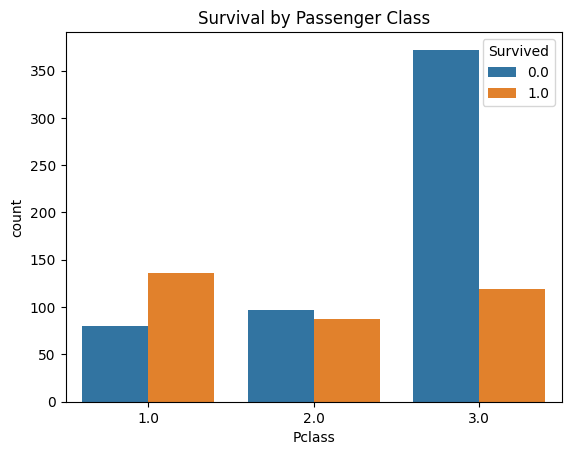

In [26]:
# Analyze survival based on passenger class

print("\nSurvival by Passenger Class:\n", titanic_data_filled.groupby('Pclass')['Survived'].value_counts())

sns.countplot(x='Pclass', hue='Survived', data=titanic_data_filled)

plt.title('Survival by Passenger Class')

plt.show()


Survival by Age Group:
 Age_group  Survived
Child      0.0          80
           1.0          74
Adult      0.0         462
           1.0         267
Senior     0.0           7
           1.0           1
Name: count, dtype: int64


C:\Users\Aagaaz Kapoor\AppData\Local\Temp\ipykernel_8732\3343749221.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print("\nSurvival by Age Group:\n", titanic_data_filled.groupby('Age_group')['Survived'].value_counts())


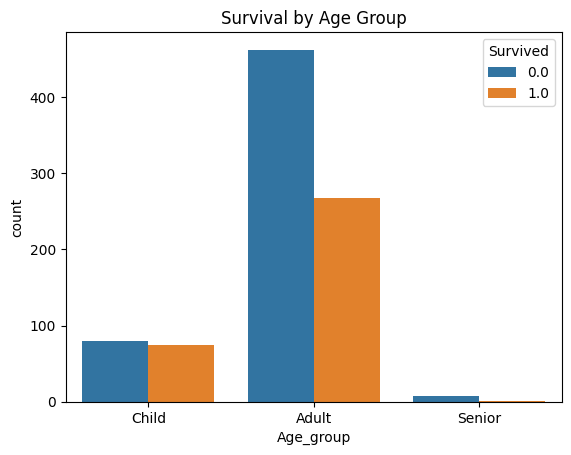

In [27]:
# Analyze survival based on age groups (create age bins)

titanic_data_filled['Age_group'] = pd.cut(titanic_data_filled['Age'], bins=[0, 18, 65, 100], labels=['Child', 'Adult', 'Senior'])

print("\nSurvival by Age Group:\n", titanic_data_filled.groupby('Age_group')['Survived'].value_counts())

sns.countplot(x='Age_group', hue='Survived', data=titanic_data_filled)

plt.title('Survival by Age Group')

plt.show()


Survival by Gender and Class:
 Sex     Pclass  Survived
female  1.0     1.0          91
                0.0           3
        2.0     1.0          70
                0.0           6
        3.0     0.0          72
                1.0          72
male    1.0     0.0          77
                1.0          45
        2.0     0.0          91
                1.0          17
        3.0     0.0         300
                1.0          47
Name: count, dtype: int64


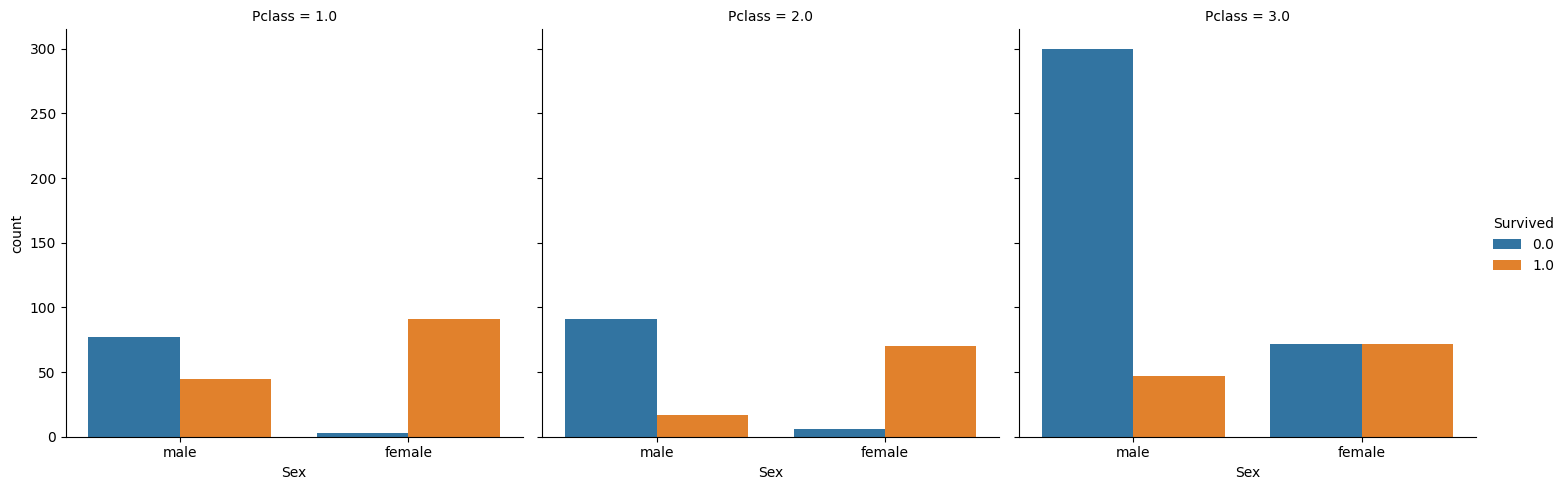

In [29]:
# Further exploration: Analyze survival based on combinations of factors

# Example: Survival based on gender and class

print("\nSurvival by Gender and Class:\n", titanic_data_filled.groupby(['Sex', 'Pclass'])['Survived'].value_counts())

sns.catplot(x='Sex', hue='Survived', col='Pclass', kind='count', data=titanic_data_filled)

plt.show()

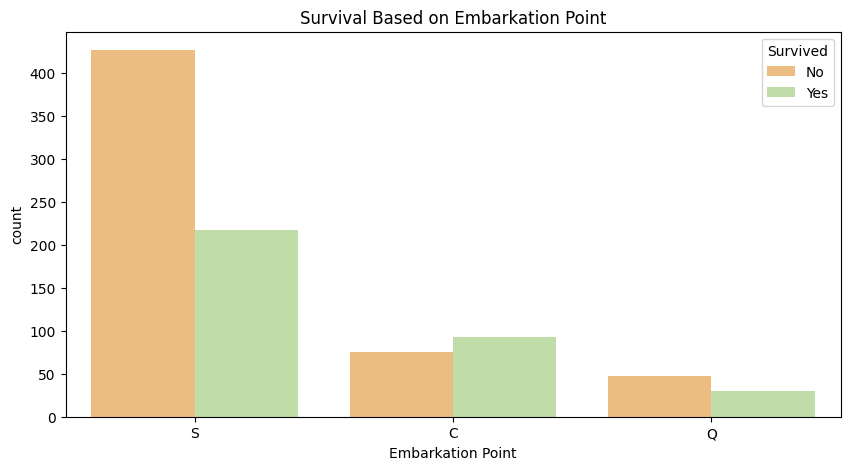

In [31]:
# Survival Based on Embarkation Point

plt.figure(figsize=(10, 5))

sns.countplot(x='Embarked', hue='Survived', data=titanic_data, palette='Spectral')

plt.title('Survival Based on Embarkation Point')

plt.xlabel('Embarkation Point')

plt.ylabel('count')

plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()

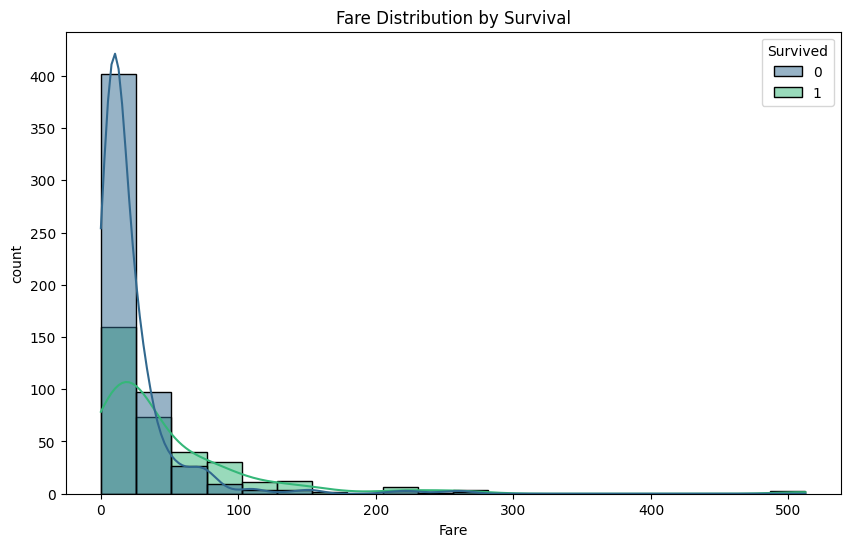

In [34]:
# Survival Based on Fare

plt.figure(figsize=(10, 6))

sns.histplot(titanic_data, x='Fare', hue='Survived', bins=20, kde=True, palette='viridis')

plt.title('Fare Distribution by Survival')

plt.xlabel('Fare')

plt.ylabel('count')

plt.show()

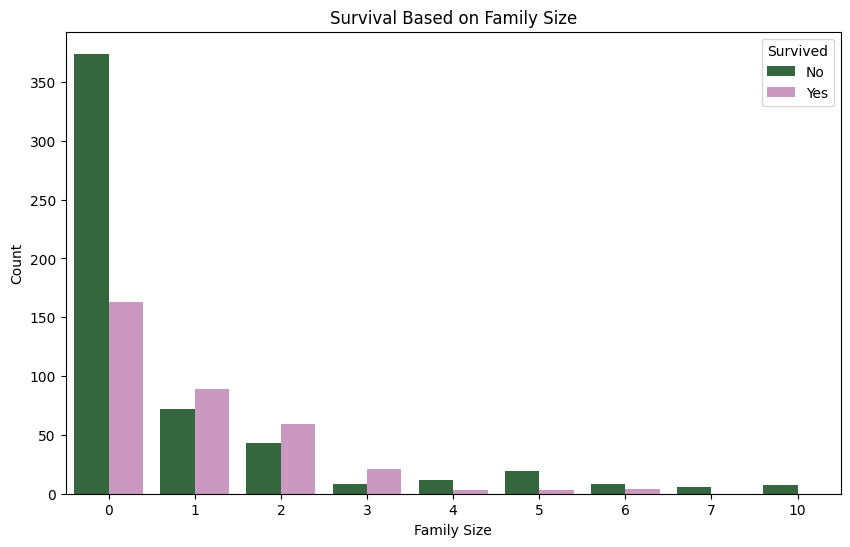

In [36]:
# Family Size Analysis

titanic_data['family_size'] = titanic_data['SibSp'] + titanic_data['Parch']



plt.figure(figsize=(10, 6))

sns.countplot(x='family_size', hue='Survived', data=titanic_data, palette='cubehelix')

plt.title('Survival Based on Family Size')

plt.xlabel('Family Size')

plt.ylabel('Count')

plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()

In [37]:
# Create Age Group

bins = [0, 12, 18, 40, 60, 80]

labels = ['Child', 'Teenager', 'Adult', 'Middle-aged', 'Senior']

titanic_data['age_group'] = pd.cut(titanic_data['Age'], bins=bins, labels=labels)

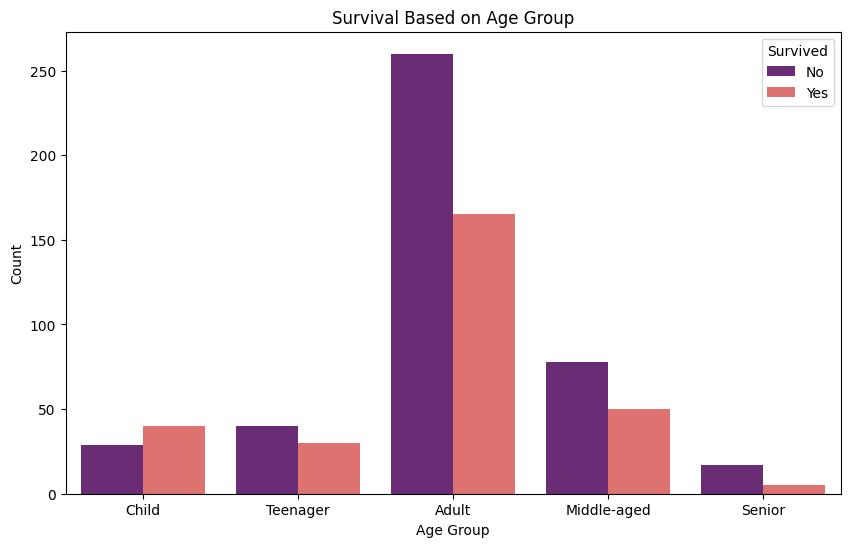

In [38]:
# Visualize Survival by Age Group

plt.figure(figsize=(10, 6))

sns.countplot(x='age_group', hue='Survived', data=titanic_data, palette='magma')

plt.title('Survival Based on Age Group')

plt.xlabel('Age Group')

plt.ylabel('Count')

plt.legend(title='Survived', labels=['No', 'Yes'])

plt.show()

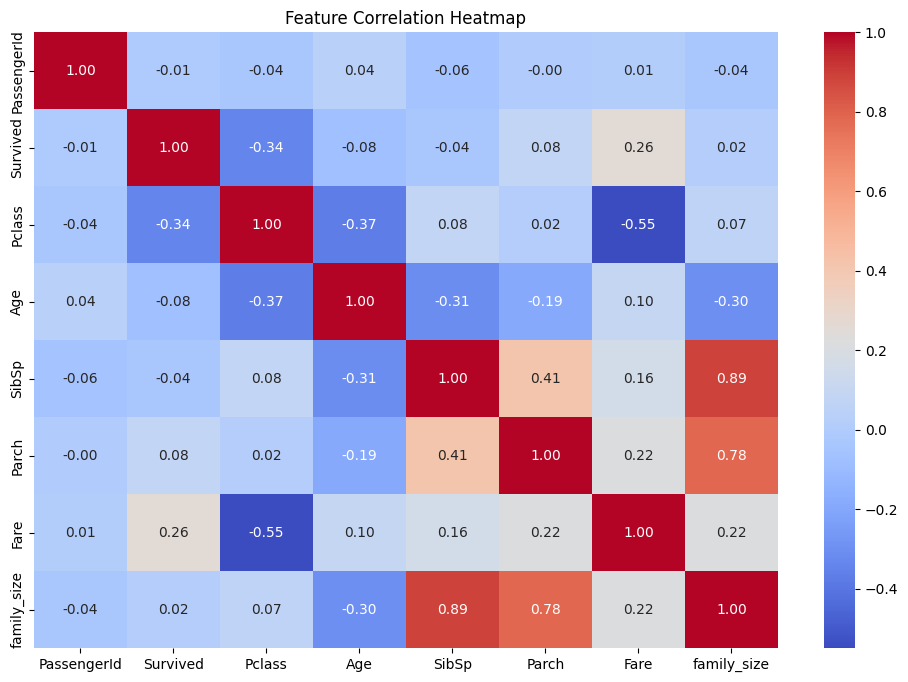

In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation heatmap
plt.figure(figsize=(12, 8))

# Select only numeric features for correlation calculation
numeric_features = titanic_data.select_dtypes(include=np.number)

sns.heatmap(numeric_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Feature Correlation Heatmap')
plt.show()
